In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


plt.style.use('classic')
random.seed(42)


In [2]:
R_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Lareina/main/Data/Regression_Train.csv")
R_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Lareina/main/Data/Regression_Test.csv")

In [3]:
R_train.isna().sum()

R_train=R_train.dropna()

R_test.isna().sum()

R_train.head()

R_test.head()

,Unnamed: 0,sugar_world,sugar_world_past_ma12
0,504,0.1713,0.190392
1,505,0.1437,0.185708
2,506,0.1477,0.179550
3,507,0.1519,0.174825
4,508,0.1340,0.171325


In [5]:
R_train.head()

,Unnamed: 0,sugar_world,sugar_world_past_ma12
1,1,0.0679,0.066600
2,2,0.0683,0.067250
3,3,0.0681,0.067600
4,4,0.0683,0.067725
5,5,0.0666,0.067840


In [7]:
X_train = pd.DataFrame(R_train['sugar_world_past_ma12'])
y_train = pd.DataFrame(R_train['sugar_world'])
R_test.head()

,Unnamed: 0,sugar_world,sugar_world_past_ma12
0,504,0.1713,0.190392
1,505,0.1437,0.185708
2,506,0.1477,0.179550
3,507,0.1519,0.174825
4,508,0.1340,0.171325


In [11]:
X_test = pd.DataFrame(R_test['sugar_world_past_ma12'])
y_test = pd.DataFrame(R_test['sugar_world'])
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.192585
1,0.188599
2,0.183356
3,0.179334
4,0.176355
...,...
247,0.387113
248,0.384564
249,0.381655
250,0.379012


In [13]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

mdl = linear_model.LinearRegression().fit(X_train,y_train)

r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

# Calculate MSE and store it
mse_values = []
mse = mean_squared_error(y_test, y_pred)
mse_values.append(mse)

# Calculate the average MSE across all folds
average_mse = sum(mse_values) / len(mse_values)

print(f'Average Mean Squared Error: {average_mse}')

R2 Score: 0.6951040750056646
Average Mean Squared Error: 0.004212175811533187


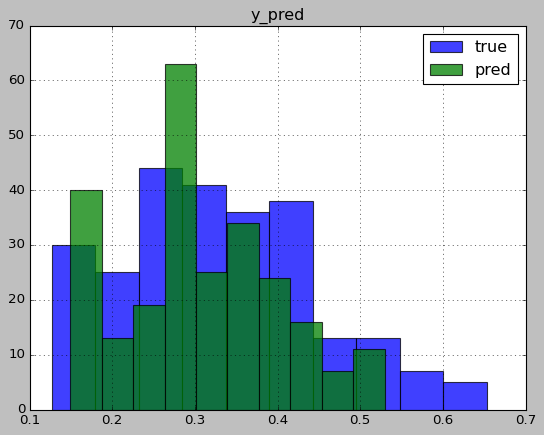

In [14]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()




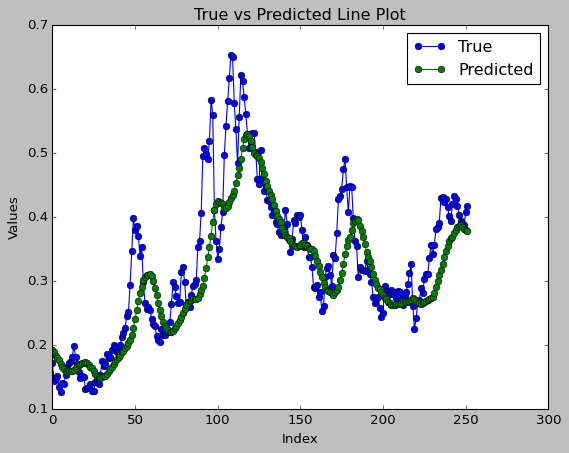

In [15]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true and predicted values

# Create an array of indices for the x-axis
indices = range(len(y_test))

# Plotting the true values as a line
plt.plot(indices, y_test, label='True', marker='o')

# Plotting the predicted values as a line
plt.plot(indices, y_pred, label='Predicted', marker='o')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('True vs Predicted Line Plot')

# Adding a legend
plt.legend()

# Display the plot
plt.show()
